## **Informasi Mahasiswa**

Nama: Ahmad Faqih Al Ghiffary

NPM: 2108107010072

# **Jenis Dataset**

Saya mengambil dataset dari kaggle https://www.kaggle.com/datasets/camnugent/california-housing-prices

Dataset berisikan data jenis-jenis Iris Flower

Di bawah ini merupakan kolom-kolom pada dataset
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea



# **Studi Kasus**

Diberikan Dataset mengenai perumahan california, tugas ini akan berfokus untuk menemukan relasi dari Populasi dengan jumlah kamar pada suatu blok menggunakan SVM Regression.

# **Preprocessing data**

Pertama kali import terlebih dahulu library-library yang diperlukan

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Kemudian akan dibaca dataset dan dilihat informasi dari dataset secara umum

In [96]:
df_big = pd.read_csv("housing.csv")

In [97]:
df_big.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Terdapat 20.000+ data, yang dimana akna memakan waktu yang cukup lama saat melakukan pemodelan, untuk mempercepat, saya memotong jumlah data

In [99]:
# Define the desired sample size (e.g., 50% of the original dataset)
sample_size = 0.01  # Adjust as needed

# Perform random sampling
df = df_big.sample(frac=sample_size, random_state=42)  # Setting random_state for reproducibility

# Display the sampled DataFrame
df.info()  # Adjust the number of rows to display as needed

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 20046 to 16038
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           206 non-null    float64
 1   latitude            206 non-null    float64
 2   housing_median_age  206 non-null    float64
 3   total_rooms         206 non-null    float64
 4   total_bedrooms      0 non-null      float64
 5   population          206 non-null    float64
 6   households          206 non-null    float64
 7   median_income       206 non-null    float64
 8   median_house_value  206 non-null    float64
 9   ocean_proximity     206 non-null    object 
dtypes: float64(9), object(1)
memory usage: 17.7+ KB


In [100]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,206.000000,206.000000,206.000000,206.000000,0.0,206.000000,206.000000,206.000000,206.000000
mean,-119.465243,35.487136,29.364078,2570.509709,NaN,1483.000000,511.262136,3.836267,206390.325243
std,2.003522,2.096949,11.917950,1787.991697,NaN,1057.340096,386.649282,1.949899,111773.729431
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.830000,33.965000,19.000000,1309.750000,NaN,782.000000,259.750000,2.568400,130450.000000
50%,-118.475000,34.200000,30.000000,2171.500000,NaN,1240.000000,427.500000,3.415400,176000.000000
75%,-117.982500,37.472500,38.000000,3469.000000,NaN,1890.250000,628.500000,4.624275,268500.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


In [101]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        206
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [102]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        206
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Terdapat beberapa kolom kosong pada kolom "total_bedrooms", namun saya tidak akan memerlukan kolom tersebut, jadi akan saya drop

In [103]:
df.drop(['total_bedrooms', 'ocean_proximity'], axis=1, inplace=True)

In [104]:
# Show unique value counts for each columns
for column in df.columns:
    unique_values_count = df[column].value_counts()
    print(f"Unique values count for column '{column}': {unique_values_count.size}\n")

Unique values count for column 'longitude': 154

Unique values count for column 'latitude': 140

Unique values count for column 'housing_median_age': 47

Unique values count for column 'total_rooms': 204

Unique values count for column 'population': 199

Unique values count for column 'households': 178

Unique values count for column 'median_income': 203

Unique values count for column 'median_house_value': 193



<Axes: >

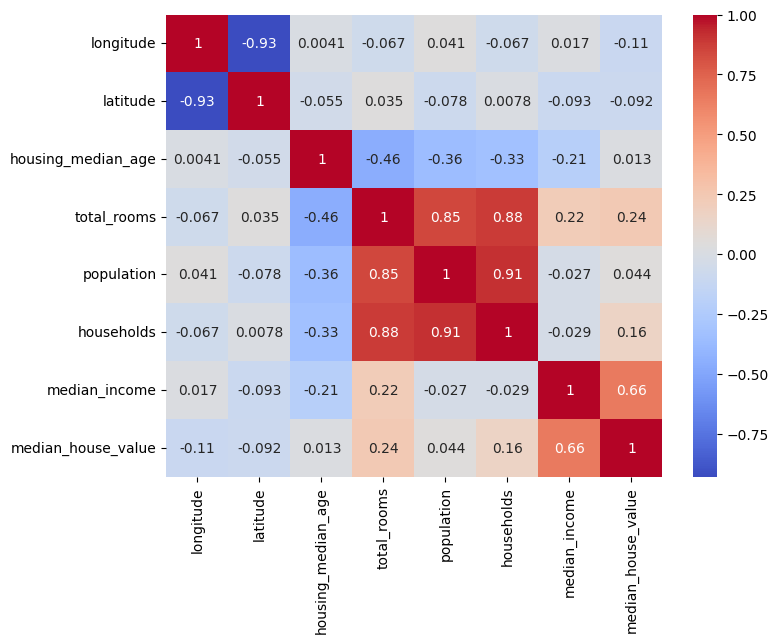

In [105]:
# korelasi antar kolom pada dataset
df_cor =df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

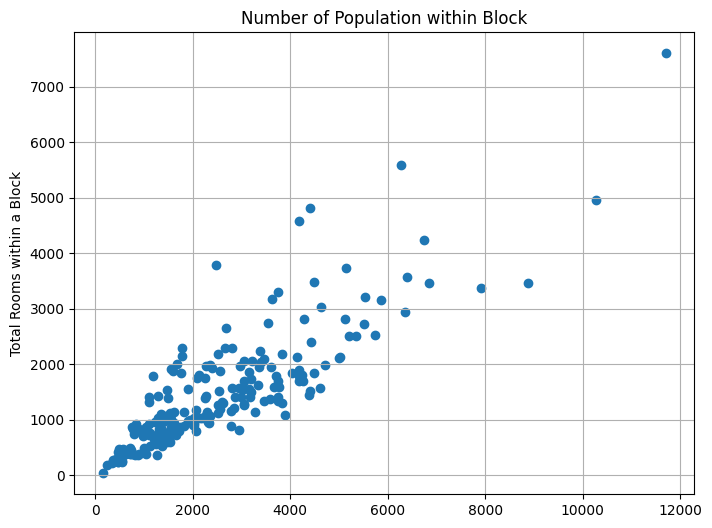

In [106]:
# plot price vs distance to the nearest MRT station
plt.figure(figsize=(8,6))
plt.scatter(df['total_rooms'], df['population'])
plt.ylabel('Total Rooms within a Block')
plt.title('Number of Population within Block')
plt.grid(True)
plt.show()

# **Membangun Model**

In [107]:
scaler = StandardScaler() 

X = df[['total_rooms']]  
y = df['population']

# Scaling both of variabel
X_scaled = scaler.fit_transform(X)  
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [108]:
# Instantiate SVR with polynomial kernel
svr_polynomial = SVR(kernel='poly', degree=2)

# Train SVR model
svr_polynomial.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr_polynomial.predict(X_test)

# **Visualisasi Hasil Model**

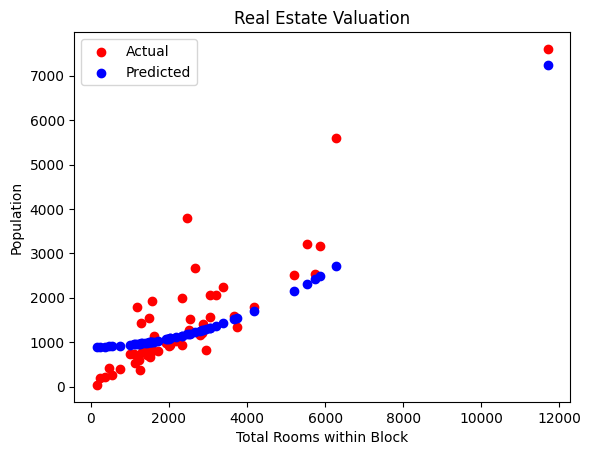

In [109]:
# Scatter plot of test data and predicted data
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.title('Real Estate Valuation')
plt.xlabel('Total Rooms within Block')  # Update with appropriate label
plt.ylabel('Population')
plt.legend()
plt.show()